In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
df=pd.read_excel("C:/Users/sravanthi/Downloads/Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [ ]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
df.set_index('Month', inplace=True)#making the month column as index
df.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [ ]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [ ]:
df[df.duplicated()].shape #found the 16 duplicated rows

(16, 1)

In [ ]:
df.drop_duplicates(inplace=True)# removed the duplicated

In [ ]:
df.shape

(80, 1)

In [ ]:
df1 = df.copy()

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

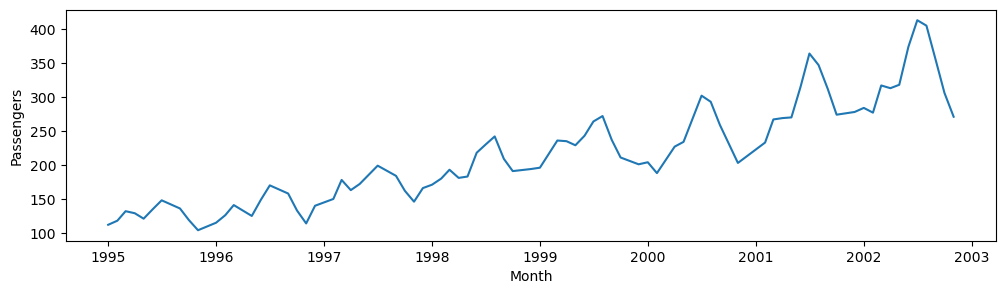

In [ ]:
# EDA
#lineplot

plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Passengers",data=df1)

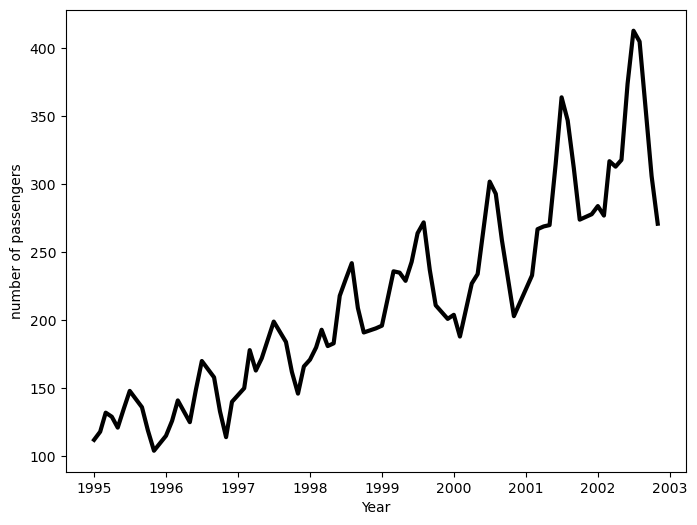

In [ ]:
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df1['Passengers'], color = 'black', linewidth=3)
plt.xlabel('Year')
plt.ylabel("number of passengers")
plt.show()

<AxesSubplot:>

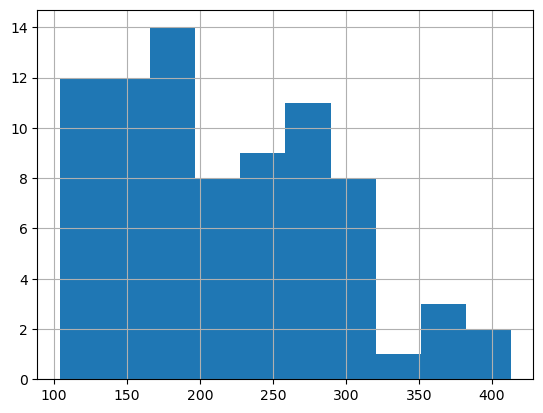

In [ ]:
df1["Passengers"].hist()

<AxesSubplot:ylabel='Density'>

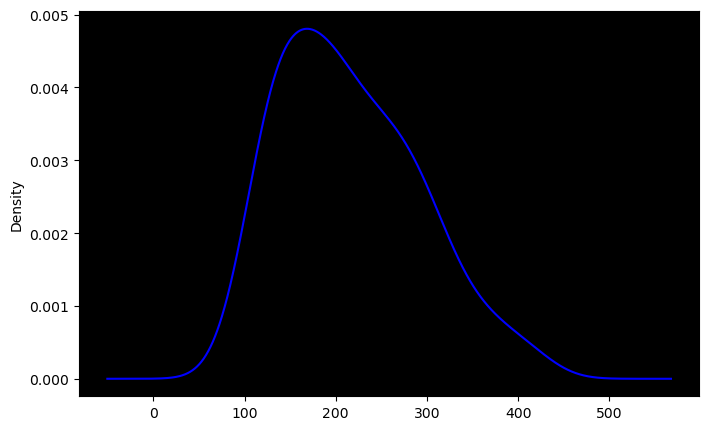

In [ ]:
#density plot
ax =plt.axes()
ax.set_facecolor('black')
df1["Passengers"].plot(kind='kde',figsize=(8,5),color='blue')

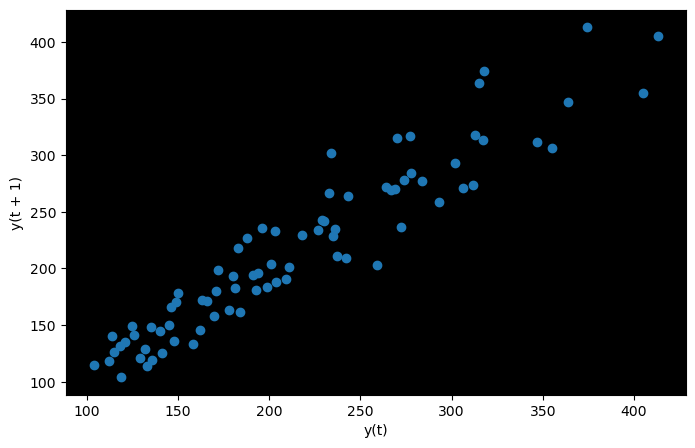

In [ ]:
# Lagplot
from pandas.plotting import lag_plot
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor("black")
lag_plot(df1['Passengers'])
plt.show()

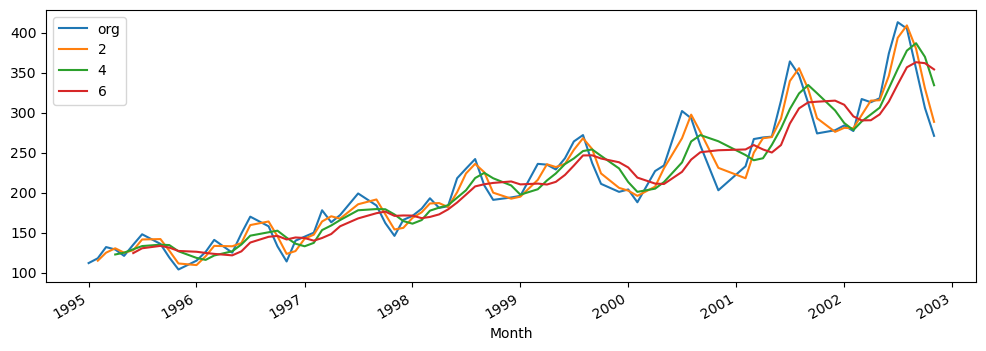

In [ ]:
plt.figure(figsize=(12,4))
df1.Passengers.plot(label="org")
for i in range(2,8,2):
    df1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

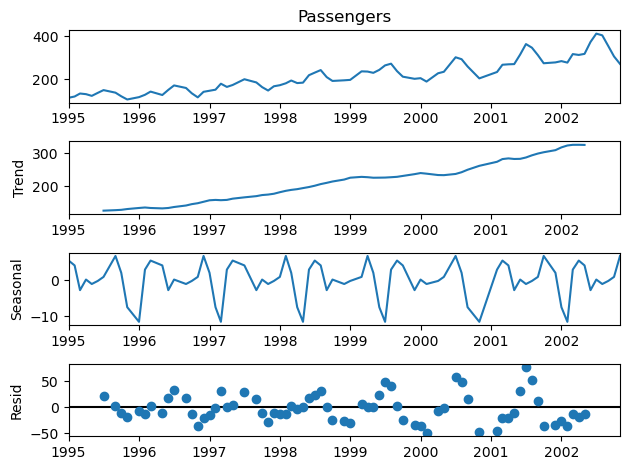

In [ ]:
#Timeseries decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

<AxesSubplot:xlabel='Passengers'>

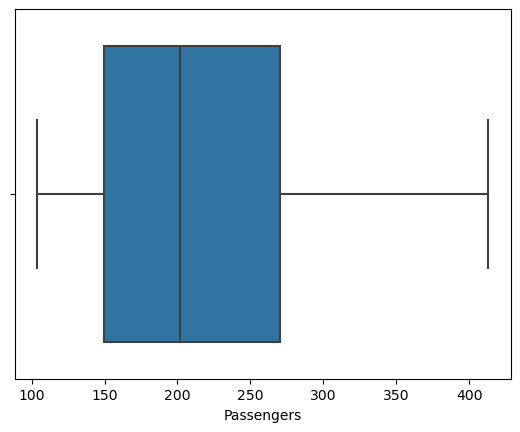

In [ ]:
sns.boxplot(x = 'Passengers',data=df1)

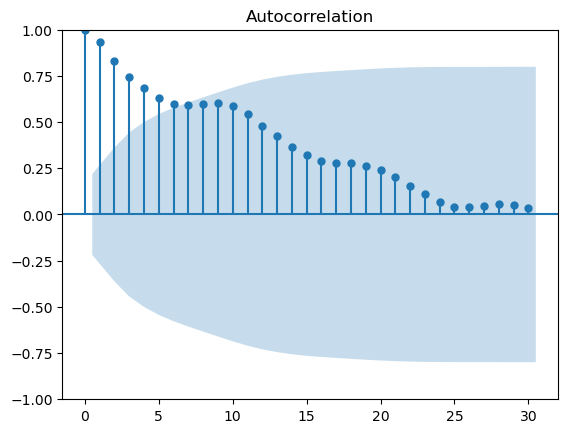

In [ ]:
#Autocorrelation Plot
plot_acf(df1,lags=30)
plt.show()

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN
1997-07-31       199.0
1997-08-31         NaN
            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31 

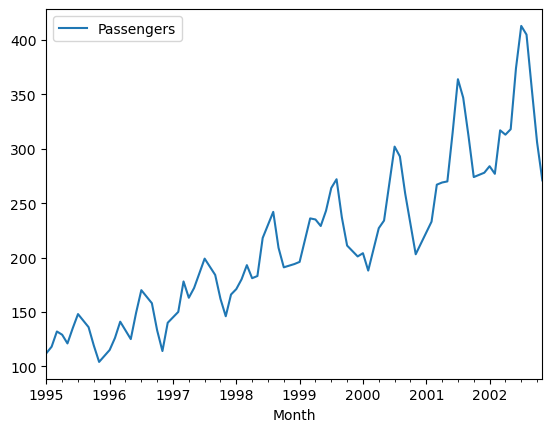

In [ ]:
#upsampling
upsampled = df1.resample('M').mean()
print(upsampled.head(32))

interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))
interpolated.plot()
plt.show()

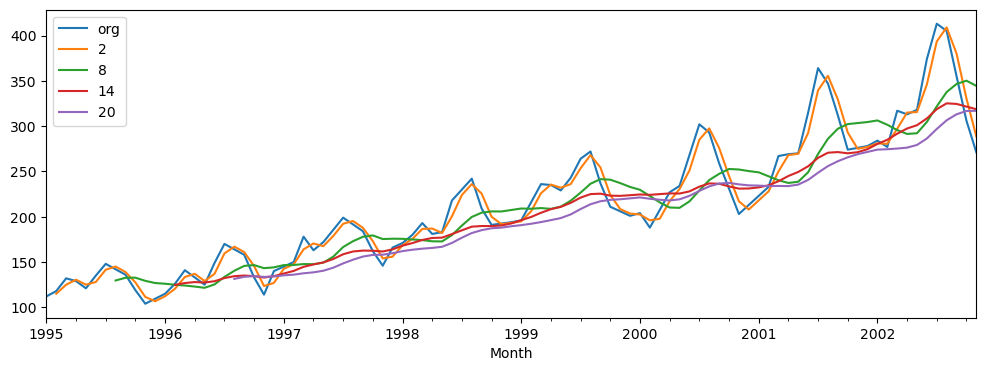

In [ ]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


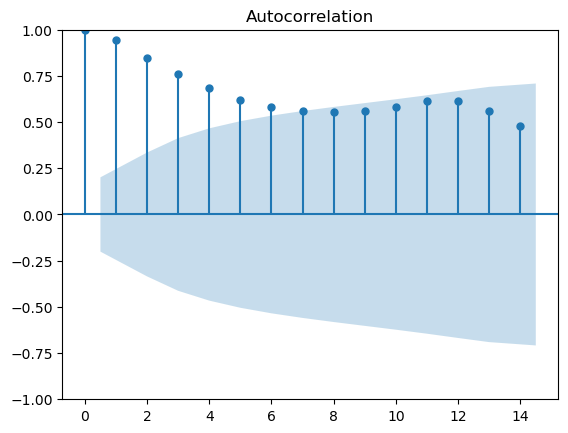

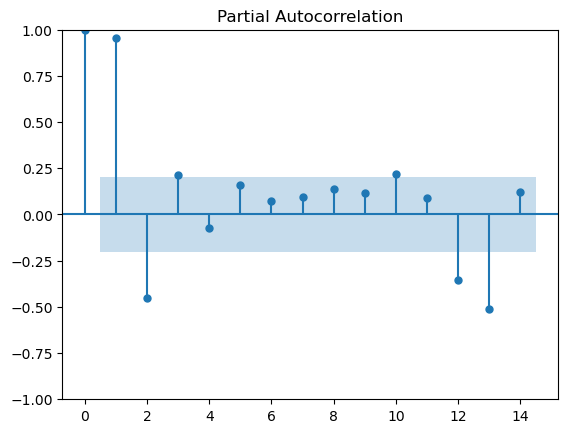

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()

In [ ]:
import numpy as np

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
#forecasting models

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
#SimpleExp0nentialMethod
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

11.181638722453021

In [ ]:
#Holt method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\Users\divya\AppData\Local\Temp\ipykernel_16684\3268353677.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)


12.424434193053463

In [ ]:
#Final Model by combining train and test
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

In [ ]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

interpolated.reset_index(inplace=True)
interpolated['t'] = 1

In [ ]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

interpolated
interpolated['t_sq'] = (interpolated['t'])**2 # inserted t_sq column with values
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # year extraction
interpolated

C:\Users\divya\AppData\Local\Temp\ipykernel_16684\106040208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1


,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [ ]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column
months

months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']] # storing the months as serial wise again in months variable

In [ ]:
airdata = pd.concat([interpolated,months],axis=1)
airdata.head()

airdata['log_passengers'] = np.log(airdata['Passengers'])
airdata

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


<AxesSubplot:xlabel='month', ylabel='year'>

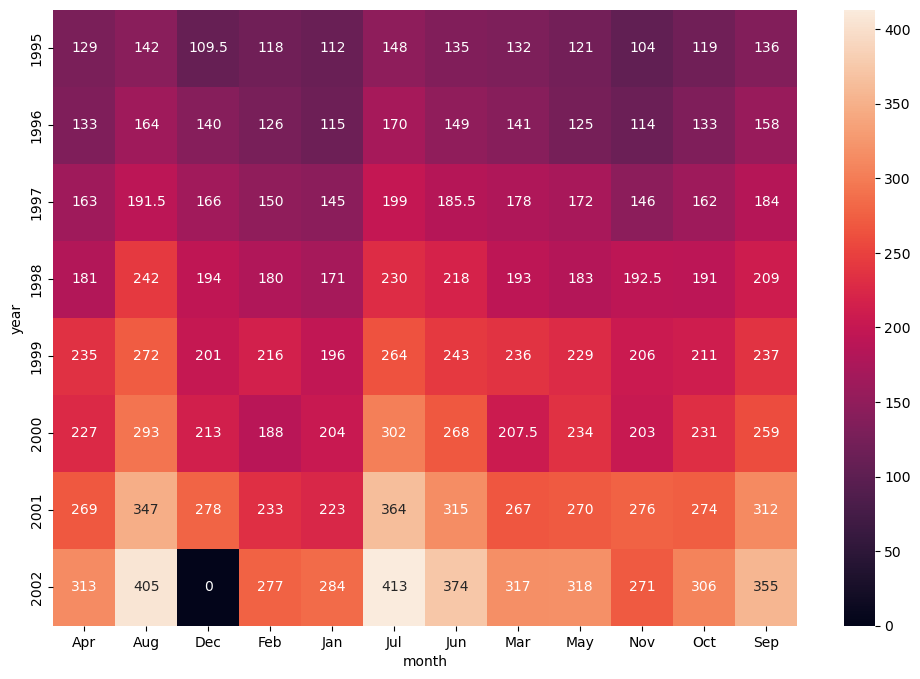

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airdata,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='month', ylabel='Passengers'>

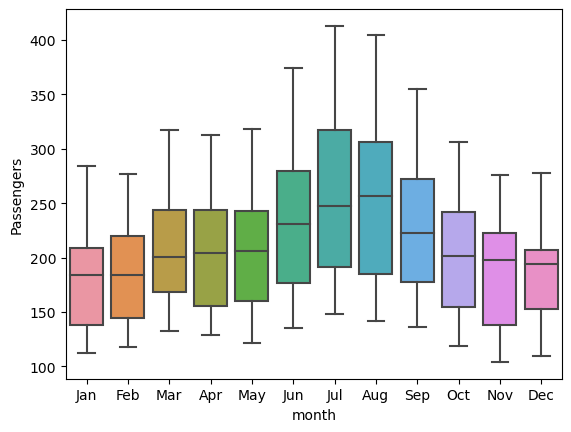

In [ ]:
sns.boxplot(x="month",y="Passengers",data= airdata)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

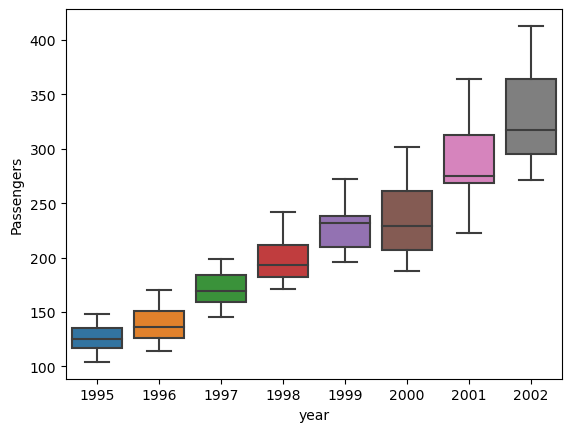

In [ ]:
sns.boxplot(x="year",y="Passengers",data= airdata)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

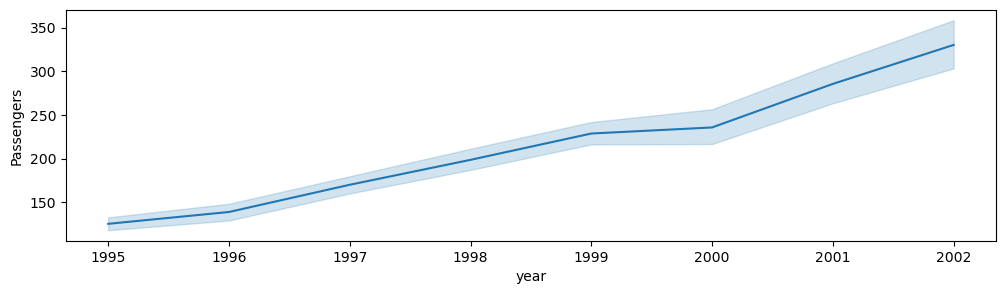

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airdata)

In [ ]:
Train = airdata.head(81) # training data
Test = airdata.tail(14) # test Data

In [ ]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [ ]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear =RMSE(Test['Passengers'], pred_linear)
rmse_linear

47.87107195088723

In [ ]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear =RMSE(Test['Passengers'], pred_linear)
rmse_linear

47.87107195088723

In [ ]:
#Quadratic
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad

42.70987042515199

In [ ]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = RMSE(Test['Passengers'], pred_add_sea)
rmse_add_sea

130.55762388601406

In [ ]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = RMSE(Test['Passengers'], np.exp(pred_Mult_sea))
rmse_Mult_sea

137.28596175917107

In [ ]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = RMSE(Test['Passengers'], np.exp(pred_Mult_add_sea))
rmse_Mult_add_sea

13.188070730263249

In [ ]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp

42.37179623821829

In [ ]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = RMSE(Test['Passengers'], pred_add_sea_quad)
rmse_add_sea_quad

26.785371911523328

In [ ]:

#Compareing the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,NaN,13.188071
4,rmse_Mult_sea,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_add_sea,137.285962


In [ ]:
# choosing "Multiplicative Additive seosanality" (mult_add_sea)

t = np.arange(97,108)
t
t_square = t*t
t_square

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [ ]:
month = pd.date_range(start='1/1/2003',end='11/1/2003',freq='MS')
month

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
Month = pd.DataFrame(month,columns=['Date'])
Month

,Date
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [ ]:
df_1 = {'t':t,'t_square': t_square}
value = pd.DataFrame(df_1)
value

,t,t_square
0,97,9409
1,98,9604
2,99,9801
3,100,10000
4,101,10201
5,102,10404
6,103,10609
7,104,10816
8,105,11025
9,106,11236


In [ ]:
data = pd.concat([Month,value],axis = 1)
data

data['year'] = data.Date.dt.strftime('%Y')
data['month'] = data.Date.dt.strftime('%b')
data['day'] = data.Date.dt.strftime('%d')
data

,Date,t,t_square,year,month,day
0,2003-01-01,97,9409,2003,Jan,01
1,2003-02-01,98,9604,2003,Feb,01
2,2003-03-01,99,9801,2003,Mar,01
3,2003-04-01,100,10000,2003,Apr,01
4,2003-05-01,101,10201,2003,May,01
5,2003-06-01,102,10404,2003,Jun,01
6,2003-07-01,103,10609,2003,Jul,01
7,2003-08-01,104,10816,2003,Aug,01
8,2003-09-01,105,11025,2003,Sep,01
9,2003-10-01,106,11236,2003,Oct,01


In [ ]:
month_dummy = pd.get_dummies(data['month'])
month_dummy

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
final_data = pd.concat([data,month_dummy],axis = 1)
final_data.head()

,Date,t,t_square,year,month,day,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,2003,Jan,01,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,98,9604,2003,Feb,01,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,99,9801,2003,Mar,01,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,100,10000,2003,Apr,01,1,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,101,10201,2003,May,01,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
pred_final = Mul_Add_sea.predict(final_data)
pred_final

0     5.755734
1     5.796889
2     5.909593
3     5.889508
4     5.881922
5     6.008328
6     6.107547
7     6.091389
8     6.000759
9     5.873278
10    5.783571
dtype: float64

In [ ]:
x = np.exp(pred_final)

In [ ]:
pred_final = pd.DataFrame(x,columns=['pred_final'])
pred_final

,pred_final
0,315.997357
1,329.273441
2,368.556048
3,361.227615
4,358.497521
5,406.802480
6,449.235264
7,442.034827
8,403.735144
9,355.412167


In [ ]:
pred_data = pd.concat([final_data,round(pred_final)],axis=1)
pred_data

,Date,t,t_square,year,month,day,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,pred_final
0,2003-01-01,97,9409,2003,Jan,01,0,0,0,1,0,0,0,0,0,0,0,316.0
1,2003-02-01,98,9604,2003,Feb,01,0,0,1,0,0,0,0,0,0,0,0,329.0
2,2003-03-01,99,9801,2003,Mar,01,0,0,0,0,0,0,1,0,0,0,0,369.0
3,2003-04-01,100,10000,2003,Apr,01,1,0,0,0,0,0,0,0,0,0,0,361.0
4,2003-05-01,101,10201,2003,May,01,0,0,0,0,0,0,0,1,0,0,0,358.0
5,2003-06-01,102,10404,2003,Jun,01,0,0,0,0,0,1,0,0,0,0,0,407.0
6,2003-07-01,103,10609,2003,Jul,01,0,0,0,0,1,0,0,0,0,0,0,449.0
7,2003-08-01,104,10816,2003,Aug,01,0,1,0,0,0,0,0,0,0,0,0,442.0
8,2003-09-01,105,11025,2003,Sep,01,0,0,0,0,0,0,0,0,0,0,1,404.0
9,2003-10-01,106,11236,2003,Oct,01,0,0,0,0,0,0,0,0,0,1,0,355.0
